In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cnn_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        #tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        #tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    return model

In [3]:
def cnnmodel():
    model = tf.keras.models.Sequential([
      tf.keras.layers.InputLayer(input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
    
      tf.keras.layers.Conv2D(filters=8, kernel_size=11, strides=4, activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    
      tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    
      tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"),

      tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=3, strides=2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation="relu"),
    
      tf.keras.layers.Dense(2, activation="softmax") # binary activation output
    ], name="model_0")
    return model

In [4]:
random_state_global = 42
epoch_val = 1000
batch_size_val = 32
threshold_val = 1e-4
IMG_SIZE = (224, 224)
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Define the paths for train and test data
train_dir =  'chest_xray/train'
test_dir =  'chest_xray/test'
val_dir =  'chest_xray/val'

# Preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Split the training data into train and validation sets
train_generator = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=True)

train_ds = train_generator.map(lambda x, y: (normalization_layer(x), y))
print(train_ds)

test_generator = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=False) # don't shuffle test data for prediction analysis
validation_generator = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=False) # don't shuffle valid data for prediction analysis

class_names = validation_generator.class_names
print(f'\nclass names are {class_names}')

# Create an instance of the CNN model
model = cnn_model()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
my_callbacks = [
            tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1, min_delta=1e-4,mode="min",restore_best_weights=False,verbose=1)]
# Fit the model
history_1 = model.fit(train_ds,
                        epochs=epoch_val,
                        validation_data=validation_generator,
                        callbacks = my_callbacks,
                        verbose=0)




Found 5102 files belonging to 2 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
<MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>
Found 624 files belonging to 2 classes.
Found 130 files belonging to 2 classes.

class names are ['NORMAL', 'PNEUMONIA']
Epoch 8: early stopping


In [5]:

loss, accuracy = model.evaluate(test_generator)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


20/20 [==============================] - 5s 225ms/step - loss: 330.3482 - accuracy: 0.7676
Test loss: 330.34820556640625
Test accuracy: 0.7676281929016113


In [6]:
test_loss, test_accuracy = model.evaluate(test_generator ,  batch_size=None, verbose="auto", callbacks=None)
print(test_loss)
print(test_accuracy)

val_loss, val_accuracy = model.evaluate(validation_generator ,  batch_size=None, verbose="auto", callbacks=None)
print(val_loss)
print(val_accuracy)


20/20 [==============================] - 4s 213ms/step - loss: 330.3482 - accuracy: 0.7676
330.34820556640625
0.7676281929016113
5/5 [==============================] - 1s 154ms/step - loss: 49.6354 - accuracy: 0.9077
49.635414123535156
0.9076923131942749


20/20 [==============================] - 4s 213ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

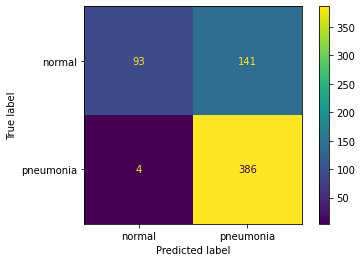

In [7]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
y_pred_test = model.predict(test_generator) 

y_pred_test = [np.argmax(class_) for class_ in y_pred_test]
print(y_pred_test) 
# x is the images , y is the class labels,that are in batches .
y_actual = [] 
flag = False 
for x , y in test_generator :
    if flag == False : 
       flag = True 
       sample_pic = x[1] 
    for vec in y :  
        y_actual.append(np.argmax(vec)) 

print(y_actual)
    
l = ["normal", "pneumonia"]
cf_mat = confusion_matrix(y_actual, y_pred_test)
cf_display = ConfusionMatrixDisplay(confusion_matrix = cf_mat , display_labels=l)
cf_display.plot() 
plt.show()